# 线性回归

## 先加载数据集

In [9]:
import numpy as np
data = np.loadtxt("data.csv",delimiter=",")
print("数据集的shape为: " ,data.shape)

数据集的shape为:  (47, 3)


### 处理数据集
数组切片:
[:,:]取所有，逗号分割不同的维度
[:,1]取第二维度的第二个元素
[:,0:2]取第一维度所有，第二维度的[0,2）区间

X: 特征
y: label
m: 数据的个数

In [10]:
X = data[:,0:2]
y = data[:,2]
m = len(y)


print("X[0]的范围为:", min(X[:,0]), " - ", max(X[:,0]))
print("X[1]的范围为:", min(X[:,1]), " - ", max(X[:,1]))
print("y的范围为:", min(y), " - ", max(y))
print("数据个数m为:", m)

X[0]的范围为: 852.0  -  4478.0
X[1]的范围为: 1.0  -  5.0
y的范围为: 169900.0  -  699900.0
数据个数m为: 47


从上述输出我们可以看出，特征有两个，并且这两个特征的范围差距很大，所以需要进行归一化的操作，将其归一化到[0,1]区间上。
x_std = (x - min) / (max - min)

In [11]:
min_x = [min(X[:,0]),min(X[:,1])]
max_x = [max(X[:,0]),max(X[:,1])]
for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        X[:,i][j] = (X[:,i][j] - min_x[i]) / (max_x[i] - min_x[i])

print(X)
print("X[0]的范围为:", min(X[:,0]), " - ", max(X[:,0]))
print("X[1]的范围为:", min(X[:,1]), " - ", max(X[:,1]))

[[0.34528406 0.5       ]
 [0.20628792 0.5       ]
 [0.42691671 0.5       ]
 [0.1555433  0.25      ]
 [0.59238831 0.75      ]
 [0.31246553 0.75      ]
 [0.18808605 0.5       ]
 [0.15857694 0.5       ]
 [0.145615   0.5       ]
 [0.17705461 0.5       ]
 [0.30005516 0.75      ]
 [0.31660232 0.5       ]
 [0.28626586 0.5       ]
 [1.         1.        ]
 [0.11472697 0.5       ]
 [0.39933811 0.75      ]
 [0.12906784 0.25      ]
 [0.10590182 0.5       ]
 [0.48455598 0.75      ]
 [0.60093767 0.75      ]
 [0.25234418 0.5       ]
 [0.28571429 0.25      ]
 [0.20739106 0.5       ]
 [0.30612245 0.75      ]
 [0.83783784 0.5       ]
 [0.06839493 0.5       ]
 [0.16712631 0.5       ]
 [0.46166575 0.5       ]
 [0.37175951 0.5       ]
 [0.49227799 0.5       ]
 [0.27220077 0.25      ]
 [0.04081633 0.        ]
 [0.32763376 0.75      ]
 [0.63017099 0.5       ]
 [0.26447876 0.75      ]
 [0.1613348  0.5       ]
 [0.10672918 0.5       ]
 [0.35300607 0.75      ]
 [0.92746828 0.75      ]
 [0.36127965 0.75      ]


画图看一下当前的效果:

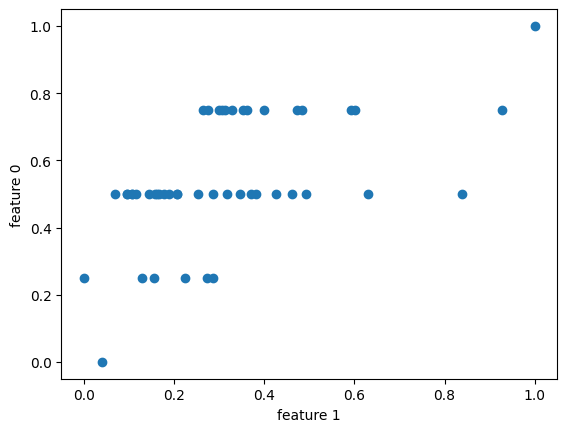

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.xlabel("feature 1")
plt.ylabel("feature 0")
plt.show()

### 构建线性模型
需要完成的函数:
1.　梯度下降算法
2.　代价函数计算

1.　梯度下降算法
求偏导，不断更新w和b

In [13]:
# 将w和b吸收入向量形式w = (w;b);
# 同样的，数据集D表示为一个m * (d + 1)的矩阵X，每行对应一个示例，前d个元素为示例的d个属性，最后一个元素置为。
# 先定义一个w
w = np.zeros((data.shape[1],1))
print(w)

[[0.]
 [0.]
 [0.]]


In [14]:
# X添加一列
X = np.column_stack((X, np.ones((m, 1))))
print(X)

[[0.34528406 0.5        1.        ]
 [0.20628792 0.5        1.        ]
 [0.42691671 0.5        1.        ]
 [0.1555433  0.25       1.        ]
 [0.59238831 0.75       1.        ]
 [0.31246553 0.75       1.        ]
 [0.18808605 0.5        1.        ]
 [0.15857694 0.5        1.        ]
 [0.145615   0.5        1.        ]
 [0.17705461 0.5        1.        ]
 [0.30005516 0.75       1.        ]
 [0.31660232 0.5        1.        ]
 [0.28626586 0.5        1.        ]
 [1.         1.         1.        ]
 [0.11472697 0.5        1.        ]
 [0.39933811 0.75       1.        ]
 [0.12906784 0.25       1.        ]
 [0.10590182 0.5        1.        ]
 [0.48455598 0.75       1.        ]
 [0.60093767 0.75       1.        ]
 [0.25234418 0.5        1.        ]
 [0.28571429 0.25       1.        ]
 [0.20739106 0.5        1.        ]
 [0.30612245 0.75       1.        ]
 [0.83783784 0.5        1.        ]
 [0.06839493 0.5        1.        ]
 [0.16712631 0.5        1.        ]
 [0.46166575 0.5        1.  

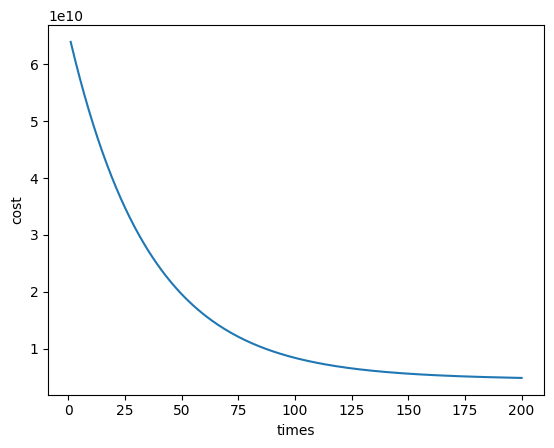

In [15]:
# 梯度下降算法

# 循环次数
num = 200
# 学习率
alpha = 0.01
# 记录每次迭代的代价
J = np.zeros((num,1))
# y需要处理为列向量，否则计算的时候会出错
y = y.reshape(-1,1)

for i in range(num):
    w = w - alpha / m * np.dot(np.transpose(X), (np.dot(X, w) - y))
    #计算代价
    J[i] = np.dot((np.transpose(np.dot(X, w) - y)), (np.dot(X ,w) - y)) / (2 * m)

plt.xlabel("times")
plt.ylabel("cost")

# arange函数，函数返回一个有终点和起点的固定步长的排列
times = np.arange(1, num + 1)
plt.plot(times, J)

### 最终运行结果(迭代两百次)

In [16]:
from mpl_toolkits.mplot3d import Axes3D

print("最终得到的参数w和b为(最后一行为b):\n", w)

最终得到的参数w和b为(最后一行为b):
 [[105101.96869027]
 [130668.75710289]
 [220732.68973994]]
